![example](images/director_shot.jpeg)

# Rilsoft Movie Data Analysis and Market Insights for a New Studio

**Authors:** John, Wilber, Maureen,Stella, Isaiah
***

## Overview

Rilsoft aims to capitalize on the rising trend of movie creation by establishing a new studio. As newcomers to the industry, the team seeks to leverage data from leading movie review platforms to generate actionable insights that will guide their entry into the competitive movie-making landscape.

## Business Problem

Rilsoft wants to venture in the movie industry to compete with other big companies that create original video content. They have the challenge of determining optimal approach to the market. The problem is how to balance financial investment, creative vision and market demand.

***
## Objectives:
* To understand  high-performing movie genres and provide recommendations based on film genres with the highest ratings
* To understand revenue projections and ROI based on the  various movie genres.
* To help in analyzing the various roles for creative movie production
* To help fomulate budget allocation
***

***
## Business Questions:
* Which movie genres consistently achieve the highest ratings and high ROI?
* What are the projected revenue and return on investment (ROI) across different movie genres for strategic decision making?
* What roles contribute to the success of high performing movie and movie genres?
* What insights can be derived from top-performing movie genres to inform Rilsoft movie studio production?
***

## Data Understanding

### Data sources and Relevance

The data comes from several reputable sources in the movie industry, including Box Office Mojo, IMDB, Rotten Tomatoes, TheMovieDB, and The Numbers. These datasets provide insights into various aspects of movie performance e.g BOM Detailed information on movie performances, release years, and industry statistics.These datasets collectively address questions about box office trends, movie profitability, audience preferences, and the relationship between budgets and revenue.Hence,the choice of datasets that would help us achieve the objectives are; the imdb dataset,bom.movie gross dataset and TN.movie budgets dataset

In [437]:
# Importing python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
%matplotlib inline

In [438]:
# Exploring IM.db table names
conn=sqlite3.connect('Datasets/im.db')

df_imdb = pd.read_sql("""SELECT name 
                      AS 'Table Names' 
                      FROM sqlite_master 
                      WHERE type='table';""", conn)
cursor = conn.cursor()
df_imdb

,Table Names
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [439]:
#View columns and data from the movie basic table
first_query = """SELECT * FROM movie_basics;"""
pd.read_sql(first_query, conn).head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [440]:
#View columns and data from the person table
Querry = """SELECT * FROM persons;"""
pd.read_sql(Querry, conn).head()

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


In [441]:
#View movie gross data and columns
df_gross=pd.read_csv('Datasets/bom.movie_gross.csv')
df_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [442]:
# Checking for null values in the movie gross dataset
df_gross.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [443]:
# Checking the column data types
df_gross.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

In [444]:
df2=pd.read_csv('Datasets/tmdb.movies.csv')
df2

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


 **Duplicate column- title

In [445]:
df_budgets=pd.read_csv('Datasets/tn.movie_budgets.csv')
df_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [446]:
df4=pd.read_csv('Datasets/rt.movie_info.tsv', sep='\t')
df4

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [447]:
# Checking for null values
df4.isnull().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [448]:
df5=pd.read_csv('Datasets/rt.reviews.tsv', sep='\t', encoding='latin-1')
df5

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


#### Summary of the various variables in the movie datasets
The Target variables include but not limited to;
Revenue data (domestic_gross, foreign_gross, worldwide_gross).
Budget data (production_budget).
Popularity metrics (popularity, rating, vote_count).
Categorical information (studio, original_language,ages, genre_ids)

The dataset variables to be utilized here are both quantitative and qualitative(categorical)




## Data Preparation/Cleaning

In [449]:
#Get all movies with their ratings
movie_ratings = ("""SELECT 
    mb.movie_id,
    mb.original_title,
    mb.primary_title, 
    mb.start_year, 
    mr.averagerating, 
    mr.numvotes,
    mb.genres
FROM movie_basics mb
JOIN movie_ratings mr 
ON mb.movie_id = mr.movie_id
""")
df_movie_ratings = pd.read_sql(movie_ratings,conn)
df_movie_ratings

,movie_id,original_title,primary_title,start_year,averagerating,numvotes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,7.0,77,"Action,Crime,Drama"
1,tt0066787,Ashad Ka Ek Din,One Day Before the Rainy Season,2019,7.2,43,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,6.9,4517,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,6.1,13,"Comedy,Drama"
4,tt0100275,La Telenovela Errante,The Wandering Soap Opera,2017,6.5,119,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,6.2,6,Documentary
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,8.7,136,"Drama,Family"
73853,tt9914642,Albatross,Albatross,2017,8.5,8,Documentary
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,6.6,5,None


In [557]:
#Get all movies with their ratings
movie_ratings_1 = ("""
SELECT 
    mb.movie_id,
    mb.original_title,
    mb.primary_title, 
    mb.start_year, 
    mb.genres,
    mr.averagerating, 
    mr.numvotes,
    dr.person_id,
    pr.primary_name,
    pr.primary_profession
FROM movie_basics mb
JOIN movie_ratings mr 
ON mb.movie_id = mr.movie_id
JOIN known_for dr
ON mb.movie_id = dr.movie_id
JOIN persons pr
ON pr.person_id = dr.person_id
""")
df_movie_ratings_known_for = pd.read_sql(movie_ratings_1,conn)
df_movie_ratings_known_for

,movie_id,original_title,primary_title,start_year,genres,averagerating,numvotes,person_id,primary_name,primary_profession
0,tt0063540,Sunghursh,Sunghursh,2013,"Action,Crime,Drama",7.0,77,nm1194313,Mahasweta Devi,writer
1,tt0063540,Sunghursh,Sunghursh,2013,"Action,Crime,Drama",7.0,77,nm1391276,Anjana Rawail,"writer,costume_designer"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,Drama,6.9,4517,nm0000953,Peter Bogdanovich,"actor,director,writer"
3,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,Drama,6.9,4517,nm0462648,Oja Kodar,"actress,writer,director"
4,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,Drama,6.9,4517,nm0600800,Leslie Moonves,"actor,executive,producer"
...,...,...,...,...,...,...,...,...,...,...
526723,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,"Drama,Family",8.7,136,nm4394529,Ahmet Faik Akinci,"director,writer"
526724,tt9914642,Albatross,Albatross,2017,Documentary,8.5,8,nm3980661,Jim Hurst,"camera_department,cinematographer,sound_depart..."
526725,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,None,6.6,5,nm1434828,Aleix Castellón,"production_manager,editorial_department,producer"
526726,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,None,6.6,5,nm3827360,Joan Amargós,actor


In [450]:
#checking for null values
df_movie_ratings.isna().sum()

movie_id            0
original_title      0
primary_title       0
start_year          0
averagerating       0
numvotes            0
genres            804
dtype: int64

No null values were found in the dataset

In [451]:
#Checking for duplicates
df_movie_ratings.duplicated().value_counts()

False    73856
Name: count, dtype: int64

In [452]:
#summary statistics
df_movie_ratings.describe()

,start_year,averagerating,numvotes
count,73856.000000,73856.000000,7.385600e+04
mean,2014.276132,6.332729,3.523662e+03
std,2.614807,1.474978,3.029402e+04
min,2010.000000,1.000000,5.000000e+00
25%,2012.000000,5.500000,1.400000e+01
50%,2014.000000,6.500000,4.900000e+01
75%,2016.000000,7.400000,2.820000e+02
max,2019.000000,10.000000,1.841066e+06


In [453]:
#data types
df_movie_ratings.dtypes

movie_id           object
original_title     object
primary_title      object
start_year          int64
averagerating     float64
numvotes            int64
genres             object
dtype: object

There are no duplicates in the dataset

In [454]:
#Get most popular genres based on number of votes:
pop_genres = ("""SELECT 
    mb.genres, 
    COUNT(mr.numvotes) AS total_votes,
    AVG(mr.averagerating) AS avg_rating
FROM movie_basics mb
JOIN movie_ratings mr 
ON mb.movie_id = mr.movie_id
GROUP BY mb.genres
ORDER BY total_votes DESC;""")
pop_genres_df = pd.read_sql(pop_genres,conn)

In [455]:
#checking for null values
pop_genres_df.isna().sum()

genres         1
total_votes    0
avg_rating     0
dtype: int64

In [456]:
#Replacing the null value with mode
pop_genres_df['genres'].fillna(pop_genres_df['genres'].mode()[0], inplace=True)

C:\Users\jmuriithi\AppData\Local\Temp\ipykernel_3076\431239078.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pop_genres_df['genres'].fillna(pop_genres_df['genres'].mode()[0], inplace=True)


In [457]:
#The null value has been replace by mode
pop_genres_df.isna().sum()

genres         0
total_votes    0
avg_rating     0
dtype: int64

In [458]:
#checking for duplicates
pop_genres_df.duplicated().value_counts()

False    924
Name: count, dtype: int64

There are no duplicates on the dataset

In [459]:
#Summary Statistics
pop_genres_df.describe()

,total_votes,avg_rating
count,924.000000,924.000000
mean,79.930736,6.280216
std,569.601986,1.053560
min,1.000000,1.400000
25%,2.000000,5.683482
50%,5.000000,6.300000
75%,29.000000,6.973125
max,11612.000000,9.400000


In [460]:
# Converting the foreign gross column data to float, removing  string values
df_gross['foreign_gross']= df_gross['foreign_gross'].replace('[,\'NaN'']', '0', regex=True).astype(float)
print(df_gross.dtypes)
df_gross['foreign_gross'].fillna(df_gross['foreign_gross'].std(), inplace=True)
df_gross

title              object
studio             object
domestic_gross    float64
foreign_gross     float64
year                int64
dtype: object


C:\Users\jmuriithi\AppData\Local\Temp\ipykernel_3076\3554737925.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_gross['foreign_gross'].fillna(df_gross['foreign_gross'].std(), inplace=True)


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,6.520000e+08,2010
1,Alice in Wonderland (2010),BV,334200000.0,6.913000e+08,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,6.643000e+08,2010
3,Inception,WB,292600000.0,5.357000e+08,2010
4,Shrek Forever After,P/DW,238700000.0,5.139000e+08,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,1.374106e+08,2018
3383,Edward II (2018 re-release),FM,4800.0,1.374106e+08,2018
3384,El Pacto,Sony,2500.0,1.374106e+08,2018
3385,The Swan,Synergetic,2400.0,1.374106e+08,2018


In [461]:
df_budgets.rename(columns={'movie': 'movie_title'}, inplace=True)

matched_df = df_movie_ratings.merge(df_budgets, left_on='original_title', right_on='movie_title', how='inner')
matched_df

,movie_id,original_title,primary_title,start_year,averagerating,numvotes,genres,id,release_date,movie_title,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,Foodfight!,2012,1.9,8248,"Action,Animation,Comedy",26,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,"$73,706"
1,tt0326592,The Overnight,The Overnight,2010,7.5,24,None,21,"Jun 19, 2015",The Overnight,"$200,000","$1,109,808","$1,165,996"
2,tt0337692,On the Road,On the Road,2012,6.1,37886,"Adventure,Drama,Romance",17,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302"
3,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,7.3,275300,"Adventure,Comedy,Drama",37,"Dec 25, 2013",The Secret Life of Walter Mitty,"$91,000,000","$58,236,838","$187,861,183"
4,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,6.5,105116,"Action,Crime,Drama",67,"Sep 19, 2014",A Walk Among the Tombstones,"$28,000,000","$26,017,685","$62,108,587"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2633,tt9684016,Alive,Alive,2016,7.1,15,"Adventure,Biography,Drama",2,"Jan 15, 1993",Alive,"$32,000,000","$36,299,670","$36,299,670"
2634,tt9851050,Sisters,Sisters,2019,4.7,14,"Action,Drama",57,"Dec 18, 2015",Sisters,"$30,000,000","$87,044,645","$106,030,660"
2635,tt9861522,Ali,Ali,2019,7.7,79,Drama,45,"Dec 25, 2001",Ali,"$109,000,000","$58,183,966","$87,683,966"
2636,tt9899880,Columbus,Columbus,2018,5.8,5,Comedy,93,"Aug 4, 2017",Columbus,"$700,000","$1,017,107","$1,110,511"


In [462]:
matched_df.columns

Index(['movie_id', 'original_title', 'primary_title', 'start_year',
       'averagerating', 'numvotes', 'genres', 'id', 'release_date',
       'movie_title', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

In [463]:
#Checking for null values
matched_df.isnull().sum()

movie_id             0
original_title       0
primary_title        0
start_year           0
averagerating        0
numvotes             0
genres               5
id                   0
release_date         0
movie_title          0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

 No null values found

In [464]:
#Checking for duplicates 
matched_df.duplicated().value_counts()

False    2638
Name: count, dtype: int64

No duplicates found

In [465]:
#Summary statistics
matched_df.describe()

,start_year,averagerating,numvotes,id
count,2638.000000,2638.000000,2.638000e+03,2638.000000
mean,2013.891205,6.241205,7.162586e+04,50.963230
std,2.554063,1.188941,1.375680e+05,28.458683
min,2010.000000,1.600000,5.000000e+00,1.000000
25%,2012.000000,5.600000,1.922500e+02,27.000000
50%,2014.000000,6.400000,1.335150e+04,51.000000
75%,2016.000000,7.100000,8.458400e+04,76.000000
max,2019.000000,9.300000,1.841066e+06,100.000000


In [466]:
columns_to_clean = ['production_budget', 'domestic_gross', 'worldwide_gross']
for column in columns_to_clean:
    matched_df[column] = matched_df[column].replace({'\\$': '', ',': ''}, regex=True).astype(float)

In [467]:
matched_df.dtypes

movie_id              object
original_title        object
primary_title         object
start_year             int64
averagerating        float64
numvotes               int64
genres                object
id                     int64
release_date          object
movie_title           object
production_budget    float64
domestic_gross       float64
worldwide_gross      float64
dtype: object

In [468]:
matched_df

,movie_id,original_title,primary_title,start_year,averagerating,numvotes,genres,id,release_date,movie_title,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,Foodfight!,2012,1.9,8248,"Action,Animation,Comedy",26,"Dec 31, 2012",Foodfight!,45000000.0,0.0,73706.0
1,tt0326592,The Overnight,The Overnight,2010,7.5,24,None,21,"Jun 19, 2015",The Overnight,200000.0,1109808.0,1165996.0
2,tt0337692,On the Road,On the Road,2012,6.1,37886,"Adventure,Drama,Romance",17,"Mar 22, 2013",On the Road,25000000.0,720828.0,9313302.0
3,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,7.3,275300,"Adventure,Comedy,Drama",37,"Dec 25, 2013",The Secret Life of Walter Mitty,91000000.0,58236838.0,187861183.0
4,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,6.5,105116,"Action,Crime,Drama",67,"Sep 19, 2014",A Walk Among the Tombstones,28000000.0,26017685.0,62108587.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2633,tt9684016,Alive,Alive,2016,7.1,15,"Adventure,Biography,Drama",2,"Jan 15, 1993",Alive,32000000.0,36299670.0,36299670.0
2634,tt9851050,Sisters,Sisters,2019,4.7,14,"Action,Drama",57,"Dec 18, 2015",Sisters,30000000.0,87044645.0,106030660.0
2635,tt9861522,Ali,Ali,2019,7.7,79,Drama,45,"Dec 25, 2001",Ali,109000000.0,58183966.0,87683966.0
2636,tt9899880,Columbus,Columbus,2018,5.8,5,Comedy,93,"Aug 4, 2017",Columbus,700000.0,1017107.0,1110511.0


In [558]:
matched_df_known_for = df_movie_ratings_known_for.merge(df_budgets, left_on='original_title', right_on='movie_title', how='inner')
matched_df_known_for


,movie_id,original_title,primary_title,start_year,genres,averagerating,numvotes,person_id,primary_name,primary_profession,id,release_date,movie_title,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,Foodfight!,2012,"Action,Animation,Comedy",1.9,8248,nm0103750,Wayne Brady,"actor,writer,producer",26,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,"$73,706"
1,tt0249516,Foodfight!,Foodfight!,2012,"Action,Animation,Comedy",1.9,8248,nm0841854,Rebecca Swanson,"writer,miscellaneous",26,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,"$73,706"
2,tt0249516,Foodfight!,Foodfight!,2012,"Action,Animation,Comedy",1.9,8248,nm3388028,Loressa Clisby,"visual_effects,art_director,director",26,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,"$73,706"
3,tt0326592,The Overnight,The Overnight,2010,None,7.5,24,nm0330085,Chris M. Gordon,"editor,miscellaneous,producer",21,"Jun 19, 2015",The Overnight,"$200,000","$1,109,808","$1,165,996"
4,tt0326592,The Overnight,The Overnight,2010,None,7.5,24,nm1170333,Kacey Arnold,"miscellaneous,writer,producer",21,"Jun 19, 2015",The Overnight,"$200,000","$1,109,808","$1,165,996"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53591,tt9861522,Ali,Ali,2019,Drama,7.7,79,nm7950798,Alper Aytekin,"miscellaneous,music_department,sound_department",45,"Dec 25, 2001",Ali,"$109,000,000","$58,183,966","$87,683,966"
53592,tt9861522,Ali,Ali,2019,Drama,7.7,79,nm9607013,Ramazan Özer,director,45,"Dec 25, 2001",Ali,"$109,000,000","$58,183,966","$87,683,966"
53593,tt9861522,Ali,Ali,2019,Drama,7.7,79,nm9607014,Fatih Gürler,"director,producer",45,"Dec 25, 2001",Ali,"$109,000,000","$58,183,966","$87,683,966"
53594,tt9861522,Ali,Ali,2019,Drama,7.7,79,nm9614031,Gurbet Gurur Canturk,writer,45,"Dec 25, 2001",Ali,"$109,000,000","$58,183,966","$87,683,966"


In [561]:
#Checking for duplicates 
matched_df_known_for.duplicated().value_counts()

False    53596
Name: count, dtype: int64

In [562]:
#Checking for null values
matched_df_known_for.isnull().sum()

movie_id                0
original_title          0
primary_title           0
start_year              0
genres                 21
averagerating           0
numvotes                0
person_id               0
primary_name            0
primary_profession    285
id                      0
release_date            0
movie_title             0
production_budget       0
domestic_gross          0
worldwide_gross         0
dtype: int64

In [566]:
# Drop the null an missing values, there are number of professions data
matched_df_known_for = matched_df_known_for.dropna().drop_duplicates()
print(matched_df_known_for.isnull().sum())
print(matched_df_known_for.duplicated().value_counts())
matched_df_known_for.columns

movie_id              0
original_title        0
primary_title         0
start_year            0
genres                0
averagerating         0
numvotes              0
person_id             0
primary_name          0
primary_profession    0
id                    0
release_date          0
movie_title           0
production_budget     0
domestic_gross        0
worldwide_gross       0
dtype: int64
False    53290
Name: count, dtype: int64


Index(['movie_id', 'original_title', 'primary_title', 'start_year', 'genres',
       'averagerating', 'numvotes', 'person_id', 'primary_name',
       'primary_profession', 'id', 'release_date', 'movie_title',
       'production_budget', 'domestic_gross', 'worldwide_gross'],
      dtype='object')

In [568]:
for column in columns_to_clean:
    matched_df_known_for[column] = matched_df_known_for[column].replace({'\\$': '', ',': ''}, regex=True).astype(float)

### Feature Engineering

In [469]:
#Calculating gross earnings
matched_df['gross_earnings'] = matched_df['worldwide_gross']-matched_df['production_budget']
matched_df.columns

Index(['movie_id', 'original_title', 'primary_title', 'start_year',
       'averagerating', 'numvotes', 'genres', 'id', 'release_date',
       'movie_title', 'production_budget', 'domestic_gross', 'worldwide_gross',
       'gross_earnings'],
      dtype='object')

In [470]:
# Save the cleaned data to the folder
output_path = "Movies_data.csv"
matched_df.to_csv(output_path, index=False)

## Visualization

### Data Modeling

In [471]:
corr_df = matched_df.select_dtypes(include=['number'])
corr_df

,start_year,averagerating,numvotes,id,production_budget,domestic_gross,worldwide_gross,gross_earnings
0,2012,1.9,8248,26,45000000.0,0.0,73706.0,-44926294.0
1,2010,7.5,24,21,200000.0,1109808.0,1165996.0,965996.0
2,2012,6.1,37886,17,25000000.0,720828.0,9313302.0,-15686698.0
3,2013,7.3,275300,37,91000000.0,58236838.0,187861183.0,96861183.0
4,2014,6.5,105116,67,28000000.0,26017685.0,62108587.0,34108587.0
...,...,...,...,...,...,...,...,...
2633,2016,7.1,15,2,32000000.0,36299670.0,36299670.0,4299670.0
2634,2019,4.7,14,57,30000000.0,87044645.0,106030660.0,76030660.0
2635,2019,7.7,79,45,109000000.0,58183966.0,87683966.0,-21316034.0
2636,2018,5.8,5,93,700000.0,1017107.0,1110511.0,410511.0


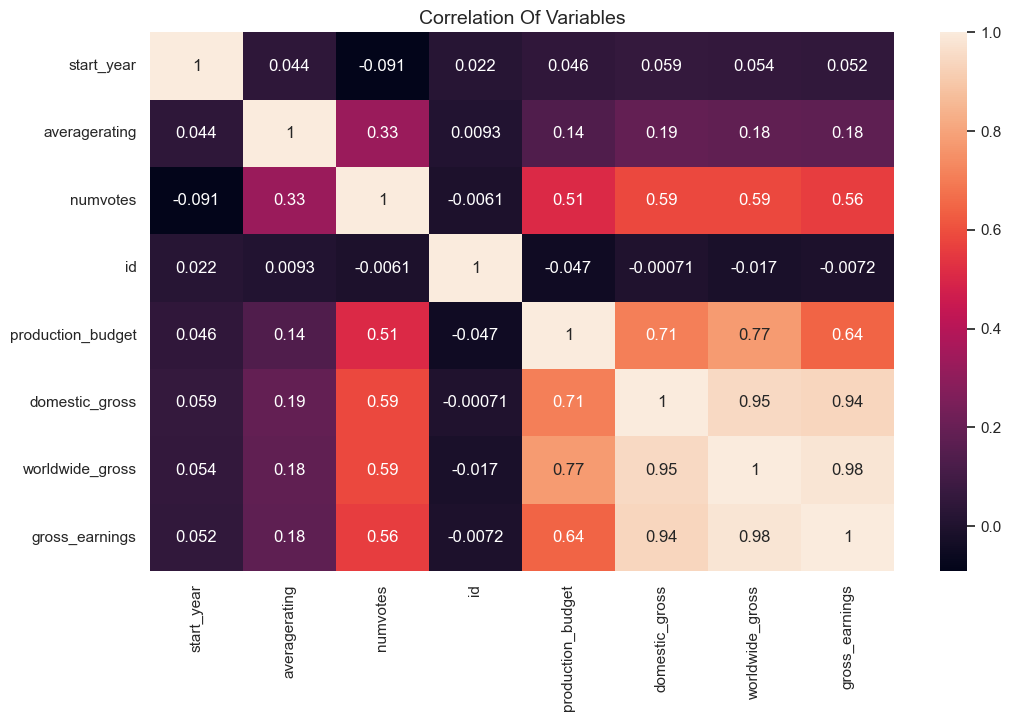

In [472]:
fig, ax = plt.subplots(figsize = (12, 7))
ax.set_title('Correlation Of Variables', fontsize=14)

corr = corr_df.corr()
# annote True  to display the correlations on each heatmap
sns.heatmap(corr, annot = True) 
# saving the graph
plt.savefig('Correlation using Heatmap');

plt.show()

In [473]:
matched_df

,movie_id,original_title,primary_title,start_year,averagerating,numvotes,genres,id,release_date,movie_title,production_budget,domestic_gross,worldwide_gross,gross_earnings
0,tt0249516,Foodfight!,Foodfight!,2012,1.9,8248,"Action,Animation,Comedy",26,"Dec 31, 2012",Foodfight!,45000000.0,0.0,73706.0,-44926294.0
1,tt0326592,The Overnight,The Overnight,2010,7.5,24,None,21,"Jun 19, 2015",The Overnight,200000.0,1109808.0,1165996.0,965996.0
2,tt0337692,On the Road,On the Road,2012,6.1,37886,"Adventure,Drama,Romance",17,"Mar 22, 2013",On the Road,25000000.0,720828.0,9313302.0,-15686698.0
3,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,7.3,275300,"Adventure,Comedy,Drama",37,"Dec 25, 2013",The Secret Life of Walter Mitty,91000000.0,58236838.0,187861183.0,96861183.0
4,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,6.5,105116,"Action,Crime,Drama",67,"Sep 19, 2014",A Walk Among the Tombstones,28000000.0,26017685.0,62108587.0,34108587.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2633,tt9684016,Alive,Alive,2016,7.1,15,"Adventure,Biography,Drama",2,"Jan 15, 1993",Alive,32000000.0,36299670.0,36299670.0,4299670.0
2634,tt9851050,Sisters,Sisters,2019,4.7,14,"Action,Drama",57,"Dec 18, 2015",Sisters,30000000.0,87044645.0,106030660.0,76030660.0
2635,tt9861522,Ali,Ali,2019,7.7,79,Drama,45,"Dec 25, 2001",Ali,109000000.0,58183966.0,87683966.0,-21316034.0
2636,tt9899880,Columbus,Columbus,2018,5.8,5,Comedy,93,"Aug 4, 2017",Columbus,700000.0,1017107.0,1110511.0,410511.0


In [495]:
# Get specific movie genres for accurate analysis(Some movies have more than one genre)
df_budget_genres = matched_df[['genres', 'production_budget', 'worldwide_gross', 'numvotes','gross_earnings']]
print(df_budget_genres.duplicated().value_counts())

False    2636
True        2
Name: count, dtype: int64


In [496]:
# Use mean to get average between the duplicated rows
df_budget_genres = df_budget_genres.groupby('genres', as_index=False).mean()
print(df_budget_genres.duplicated().value_counts())
df_budget_genres

False    302
Name: count, dtype: int64


,genres,production_budget,worldwide_gross,numvotes,gross_earnings
0,Action,2.812391e+07,7.058096e+07,2627.173913,4.245705e+07
1,"Action,Adventure",4.500000e+06,1.177400e+04,6955.000000,-4.488226e+06
2,"Action,Adventure,Animation",1.218125e+08,4.570707e+08,190419.375000,3.352582e+08
3,"Action,Adventure,Biography",8.375000e+07,2.254565e+08,236267.250000,1.417065e+08
4,"Action,Adventure,Comedy",8.234483e+07,3.379218e+08,208682.344828,2.555770e+08
...,...,...,...,...,...
297,"Sci-Fi,Thriller",1.434000e+07,4.364433e+06,10279.666667,-9.975567e+06
298,Sport,1.900000e+07,5.745503e+06,77.000000,-1.325450e+07
299,Thriller,2.718006e+07,6.491041e+07,227.738095,3.773034e+07
300,War,4.000000e+07,3.019910e+07,9.000000,-9.800895e+06


In [497]:
df_exploded = df_budget_genres.assign(genres=df_budget_genres['genres'].str.split(',')).explode('genres')
df_exploded
# df_exploded.drop_duplicates(subset=None, inplace=True, ignore_index=False)

,genres,production_budget,worldwide_gross,numvotes,gross_earnings
0,Action,2.812391e+07,7.058096e+07,2627.173913,4.245705e+07
1,Action,4.500000e+06,1.177400e+04,6955.000000,-4.488226e+06
1,Adventure,4.500000e+06,1.177400e+04,6955.000000,-4.488226e+06
2,Action,1.218125e+08,4.570707e+08,190419.375000,3.352582e+08
2,Adventure,1.218125e+08,4.570707e+08,190419.375000,3.352582e+08
...,...,...,...,...,...
297,Thriller,1.434000e+07,4.364433e+06,10279.666667,-9.975567e+06
298,Sport,1.900000e+07,5.745503e+06,77.000000,-1.325450e+07
299,Thriller,2.718006e+07,6.491041e+07,227.738095,3.773034e+07
300,War,4.000000e+07,3.019910e+07,9.000000,-9.800895e+06


In [498]:
df_exploded = df_exploded.reset_index(drop=True)
df_exploded

,genres,production_budget,worldwide_gross,numvotes,gross_earnings
0,Action,2.812391e+07,7.058096e+07,2627.173913,4.245705e+07
1,Action,4.500000e+06,1.177400e+04,6955.000000,-4.488226e+06
2,Adventure,4.500000e+06,1.177400e+04,6955.000000,-4.488226e+06
3,Action,1.218125e+08,4.570707e+08,190419.375000,3.352582e+08
4,Adventure,1.218125e+08,4.570707e+08,190419.375000,3.352582e+08
...,...,...,...,...,...
790,Thriller,1.434000e+07,4.364433e+06,10279.666667,-9.975567e+06
791,Sport,1.900000e+07,5.745503e+06,77.000000,-1.325450e+07
792,Thriller,2.718006e+07,6.491041e+07,227.738095,3.773034e+07
793,War,4.000000e+07,3.019910e+07,9.000000,-9.800895e+06


In [499]:
#Summary statistics for budget by genre:
budget_stats = df_exploded.groupby('genres')['production_budget'].describe()
budget_stats

,count,mean,std,min,25%,50%,75%,max
genres,,,,,,,,
Action,70.0,4.804199e+07,3.577022e+07,500000.0,2.037500e+07,4.200000e+07,6.237500e+07,1.563496e+08
Adventure,57.0,5.627934e+07,5.217009e+07,500000.0,1.536862e+07,4.000000e+07,8.375000e+07,2.316667e+08
Animation,14.0,5.522589e+07,4.382572e+07,5000000.0,2.203616e+07,4.303125e+07,7.843750e+07,1.450000e+08
Biography,32.0,2.743001e+07,2.127658e+07,500000.0,1.485536e+07,2.366474e+07,3.144318e+07,8.400000e+07
Comedy,75.0,2.765695e+07,2.076534e+07,900000.0,1.220000e+07,2.300000e+07,3.913167e+07,9.645946e+07
Crime,39.0,2.600301e+07,2.075530e+07,500000.0,9.450714e+06,2.446667e+07,3.950667e+07,9.000000e+07
Documentary,32.0,1.997831e+07,1.875209e+07,362500.0,5.604167e+06,1.520931e+07,2.719688e+07,6.800000e+07
Drama,124.0,2.659960e+07,2.556004e+07,500000.0,1.137304e+07,2.139098e+07,3.104167e+07,1.500000e+08
Family,32.0,3.862525e+07,3.548126e+07,350000.0,8.750000e+06,2.523750e+07,5.831250e+07,1.322750e+08


In [500]:
#Average budget per genre:
avg_budget_per_genre = df_exploded.groupby('genres')['production_budget'].mean().sort_values(ascending=False)
avg_budget_per_genre

genres
Adventure      5.627934e+07
Animation      5.522589e+07
Action         4.804199e+07
Fantasy        4.351616e+07
Sci-Fi         3.893618e+07
Family         3.862525e+07
Western        3.714500e+07
Musical        3.454028e+07
History        3.143423e+07
Sport          2.856333e+07
Comedy         2.765695e+07
Biography      2.743001e+07
Drama          2.659960e+07
Mystery        2.648097e+07
Crime          2.600301e+07
War            2.487967e+07
Thriller       2.303656e+07
Romance        2.014722e+07
Documentary    1.997831e+07
News           1.890000e+07
Horror         1.616780e+07
Music          1.584738e+07
Name: production_budget, dtype: float64

C:\Users\jmuriithi\AppData\Local\Temp\ipykernel_3076\2571049337.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_exploded, x='genres', y='production_budget', estimator=sum, palette="viridis")


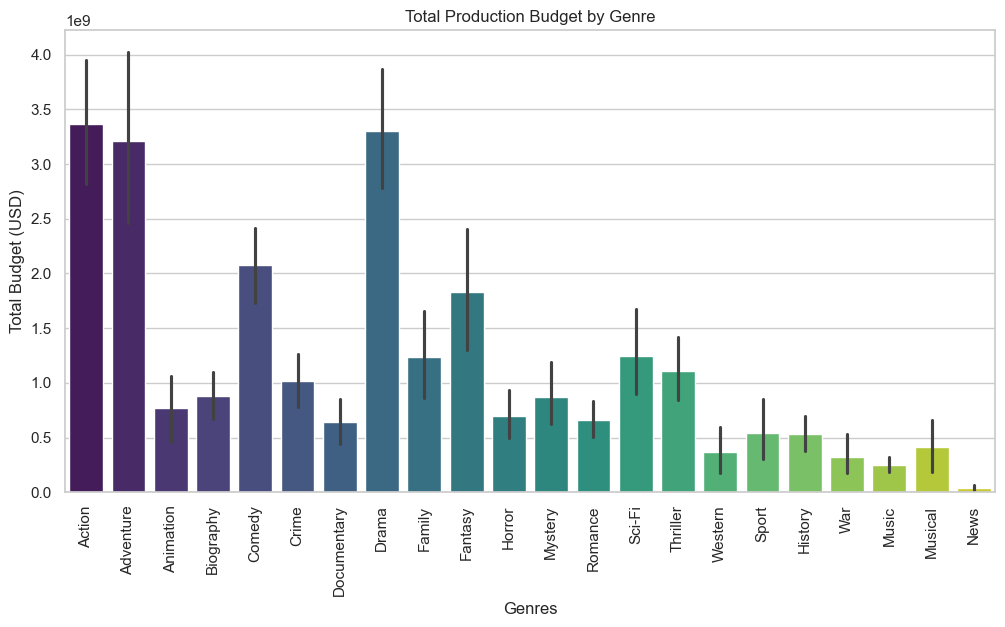

In [501]:
# Distribution of budget across genres (Bar Plot):
plt.figure(figsize=(12, 6))
sns.barplot(data=df_exploded, x='genres', y='production_budget', estimator=sum, palette="viridis")
plt.xticks(rotation=90)
plt.title('Total Production Budget by Genre')
plt.ylabel('Total Budget (USD)')
plt.xlabel('Genres')
plt.show()

In [502]:
#Average budget per genre:
avg_worldwide_gross_per_genre = df_exploded.groupby('genres')['worldwide_gross'].mean().sort_values(ascending=False)
avg_worldwide_gross_per_genre

genres
Adventure      1.832333e+08
Musical        1.796094e+08
Animation      1.701160e+08
Fantasy        1.420349e+08
Family         1.307622e+08
Sci-Fi         1.199147e+08
Action         1.160846e+08
Sport          1.131311e+08
Drama          8.100754e+07
Comedy         8.047069e+07
Mystery        7.543937e+07
Biography      7.141653e+07
Thriller       7.066527e+07
Western        6.325434e+07
Crime          5.647420e+07
History        5.492947e+07
Romance        5.222557e+07
Documentary    5.105460e+07
Music          4.789611e+07
War            4.685774e+07
Horror         4.385025e+07
News           3.165783e+07
Name: worldwide_gross, dtype: float64

C:\Users\jmuriithi\AppData\Local\Temp\ipykernel_3076\3536365497.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_exploded, x='genres', y='worldwide_gross', estimator=sum, palette="viridis")


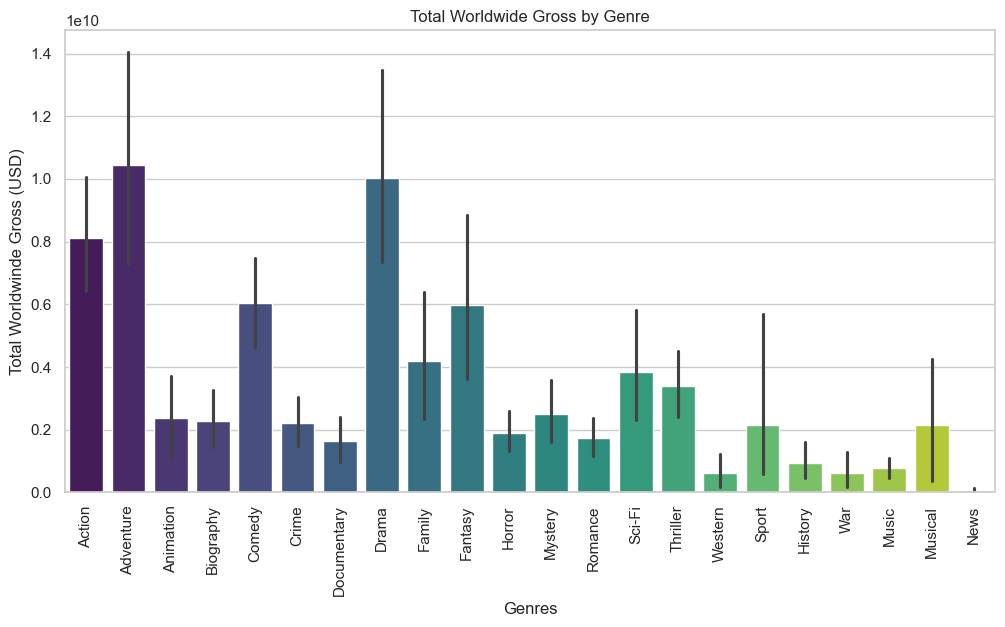

In [503]:
# Distribution of budget across genres (Bar Plot):
plt.figure(figsize=(12, 6))
sns.barplot(data=df_exploded, x='genres', y='worldwide_gross', estimator=sum, palette="viridis")
plt.xticks(rotation=90)
plt.title('Total Worldwide Gross by Genre')
plt.ylabel('Total Worldwinde Gross (USD)')
plt.xlabel('Genres')
plt.show()

In [504]:
pop_genres_df_exploded = pop_genres_df.assign(genres=pop_genres_df['genres'].str.split(',')).explode('genres')
pop_genres_df_exploded = pop_genres_df_exploded.reset_index(drop=True)
pop_genres_df_exploded

,genres,total_votes,avg_rating
0,Drama,11612,6.494265
1,Documentary,10313,7.293794
2,Comedy,5613,5.777998
3,Horror,2692,4.835475
4,Comedy,2617,6.364119
...,...,...,...
2532,Adventure,1,7.600000
2533,Sport,1,7.600000
2534,Action,1,8.700000
2535,Adventure,1,8.700000


In [505]:
pop_genres_df_exploded = pop_genres_df_exploded.groupby('genres')[['total_votes', 'avg_rating']].mean().sort_values(by='total_votes', ascending=False)
pop_genres_df_exploded['total_votes'] = pop_genres_df_exploded['total_votes'].round(0)
pop_genres_df_exploded

,total_votes,avg_rating
genres,,
Drama,143.0,6.396930
Documentary,103.0,7.279466
Comedy,93.0,6.211247
Thriller,65.0,6.063236
Horror,61.0,5.373191
Romance,54.0,6.189206
Action,51.0,6.019026
Biography,40.0,6.672649
Crime,40.0,6.089916


C:\Users\jmuriithi\AppData\Local\Temp\ipykernel_3076\37609186.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_votes', y='genres', data=pop_genres_df_exploded.head(10), palette="viridis")


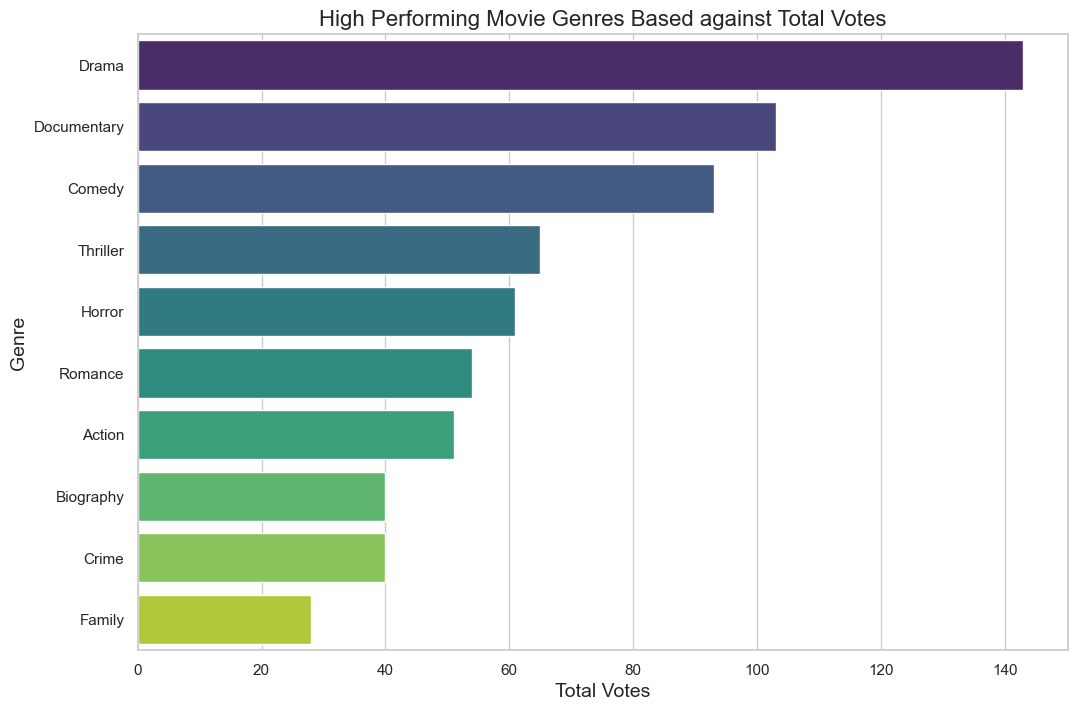

In [506]:
#Bar Graph showing high-performing movie genres
plt.figure(figsize=(12, 8))
sns.barplot(x='total_votes', y='genres', data=pop_genres_df_exploded.head(10), palette="viridis")

plt.title('High Performing Movie Genres Based against Total Votes', fontsize=16)
plt.xlabel('Total Votes', fontsize=14)
plt.ylabel('Genre', fontsize=14)
plt.show()

C:\Users\jmuriithi\AppData\Local\Temp\ipykernel_3076\657891662.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='avg_rating', y='genres', data=filtered_df.head(10).sort_values(by='avg_rating', ascending=False), palette="viridis")


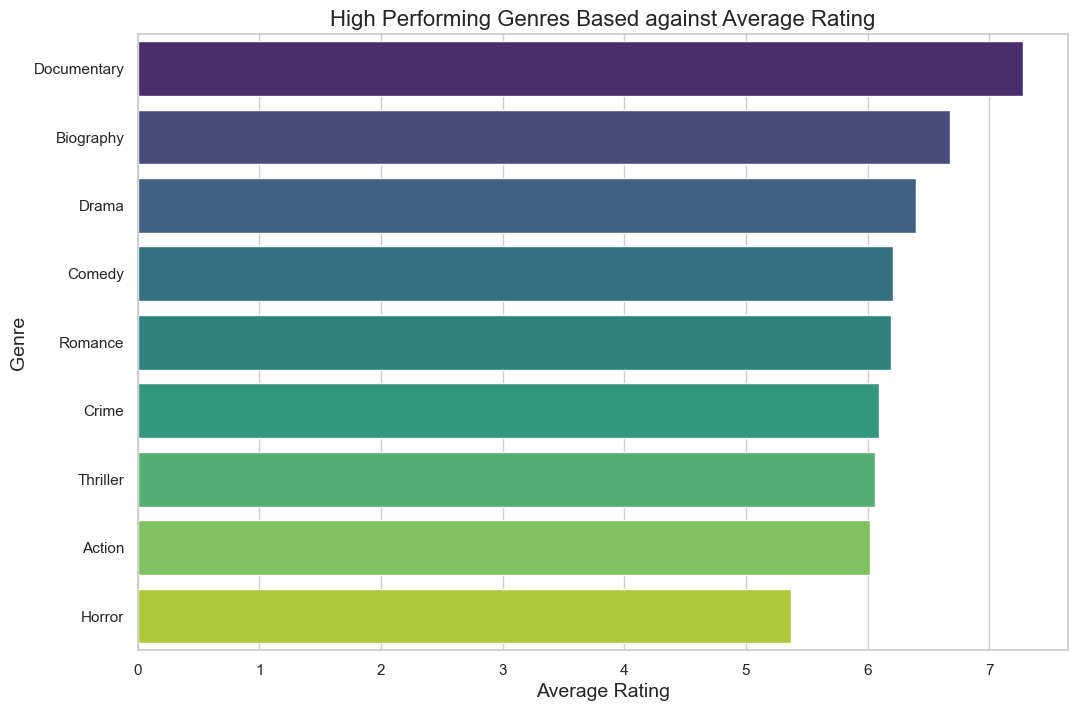

In [507]:
#Bar Graph showing high-performing movie genres

# Filter the rows where the number of votes is less than the average to avoid cases where a movie genre
# with had 1 number of vote with a high rating
average_votes = pop_genres_df_exploded['total_votes'].mean()
filtered_df = pop_genres_df_exploded[pop_genres_df_exploded['total_votes'] >= average_votes]

plt.figure(figsize=(12, 8))
sns.barplot(x='avg_rating', y='genres', data=filtered_df.head(10).sort_values(by='avg_rating', ascending=False), palette="viridis")

# Add title and labels
plt.title('High Performing Genres Based against Average Rating', fontsize=16)
plt.xlabel('Average Rating', fontsize=14)
plt.ylabel('Genre', fontsize=14)
plt.show()

Documentary was the highest performing genre followed closely by biography and drama

C:\Users\jmuriithi\AppData\Local\Temp\ipykernel_3076\2543523182.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="original_title", y="worldwide_gross", data=top_10_revenues, palette="viridis")


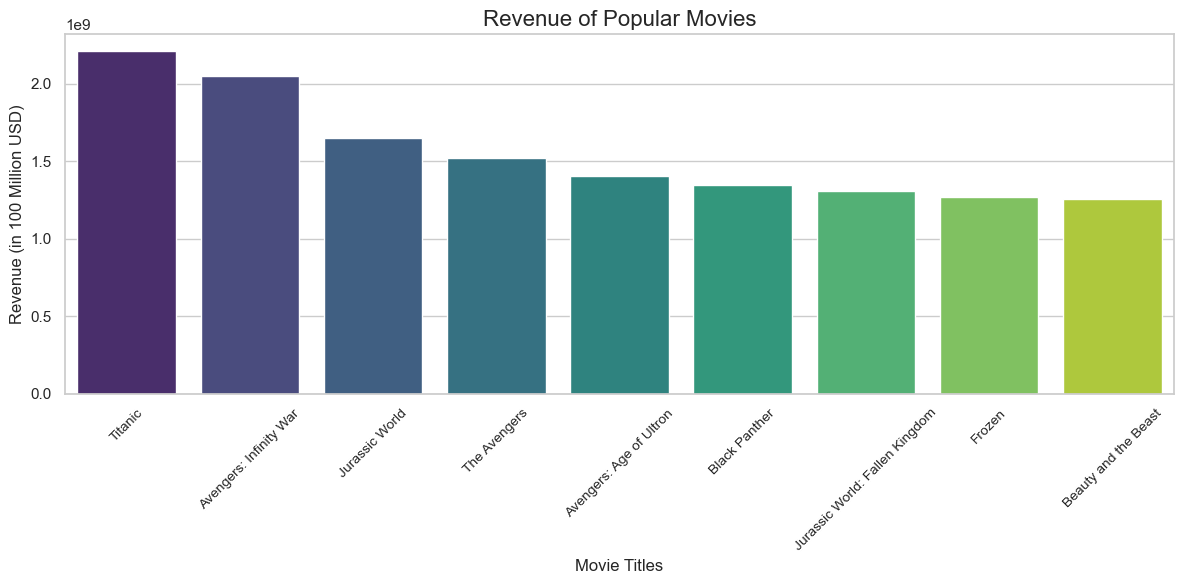

In [508]:
#Histogram to determine highest revenues
sns.set_theme(style="whitegrid")

top_10_revenues = matched_df.nlargest(10,"worldwide_gross")

top_10_revenues = top_10_revenues.sort_values("worldwide_gross", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x="original_title", y="worldwide_gross", data=top_10_revenues, palette="viridis")


plt.title("Revenue of Popular Movies", fontsize=16)
plt.xlabel("Movie Titles", fontsize=12)
plt.ylabel("Revenue (in 100 Million USD)", fontsize=12)


plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

There were several titles that generated high revenues with Titanic being the highest

C:\Users\jmuriithi\AppData\Local\Temp\ipykernel_3076\19513319.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="original_title", y="gross_earnings", data=top_10_revenues, palette="viridis")


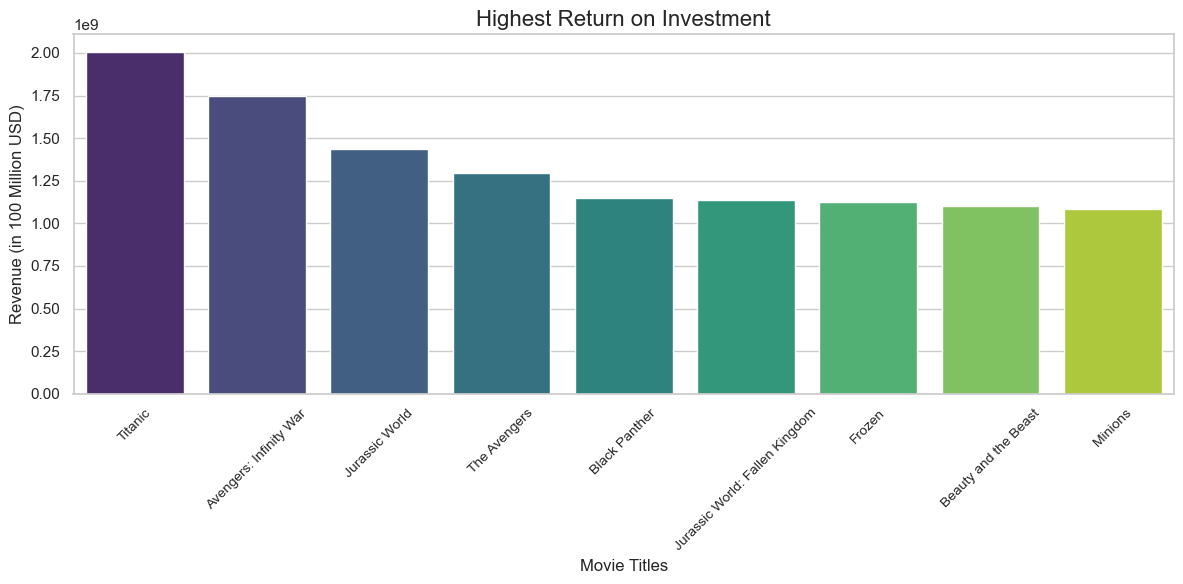

In [509]:
#Histogram to determine highest return on investment
sns.set_theme(style="whitegrid")

top_10_revenues = matched_df.nlargest(10,"gross_earnings")

top_10_revenues = top_10_revenues.sort_values("gross_earnings", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x="original_title", y="gross_earnings", data=top_10_revenues, palette="viridis")


plt.title("Highest Return on Investment", fontsize=16)
plt.xlabel("Movie Titles", fontsize=12)
plt.ylabel("Revenue (in 100 Million USD)", fontsize=12)


plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

The highest returns were still the movies with the highest revenue 

C:\Users\jmuriithi\AppData\Local\Temp\ipykernel_3076\2941899632.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="genres", y="gross_earnings", data=top_10_revenues, palette="viridis")


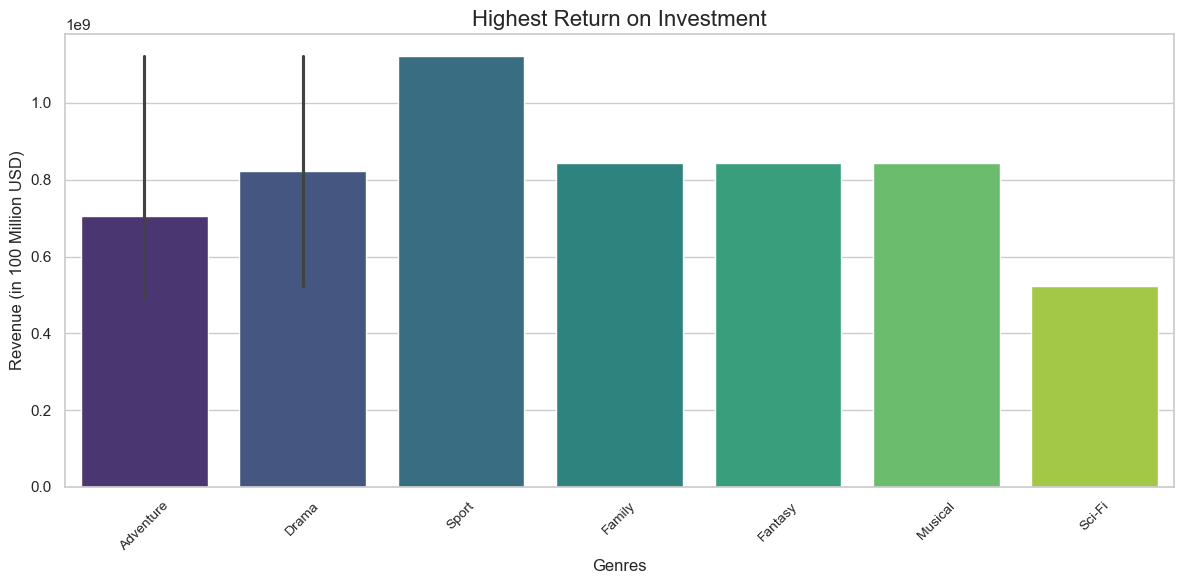

In [519]:
#Histogram to determine highest return on investment
sns.set_theme(style="whitegrid")
top_10_revenues = df_exploded.nlargest(10,"gross_earnings")
top_10_revenues = top_10_revenues.sort_values("gross_earnings", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x="genres", y="gross_earnings", data=top_10_revenues, palette="viridis")

plt.title("Highest Return on Investment", fontsize=16)
plt.xlabel("Genres", fontsize=12)
plt.ylabel("Revenue (in 100 Million USD)", fontsize=12)

plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

Adventure, Action and Sport brought the highest return on investment

C:\Users\jmuriithi\AppData\Local\Temp\ipykernel_3076\986272527.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="original_title", y="production_budget", data=top_10_revenues, palette="viridis")


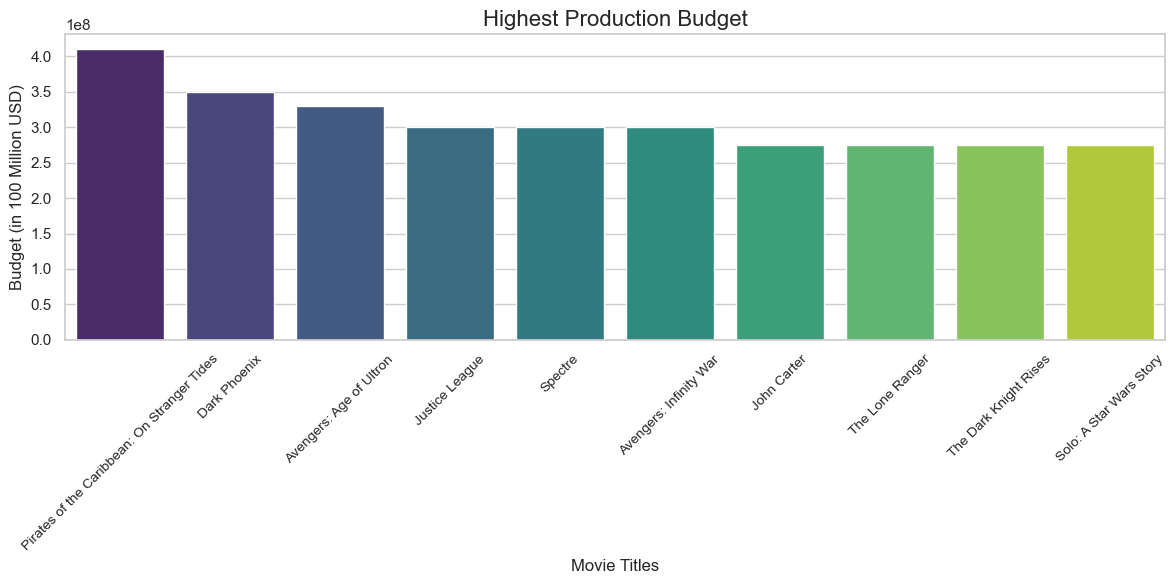

In [511]:
#Histogram to determine production budget
sns.set_theme(style="whitegrid")

top_10_revenues = matched_df.nlargest(10,"production_budget")

top_10_revenues = top_10_revenues.sort_values("production_budget", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x="original_title", y="production_budget", data=top_10_revenues, palette="viridis")


plt.title("Highest Production Budget", fontsize=16)
plt.xlabel("Movie Titles", fontsize=12)
plt.ylabel("Budget (in 100 Million USD)", fontsize=12)


plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

High production budget do not necessarily equate revenue generation

C:\Users\jmuriithi\AppData\Local\Temp\ipykernel_3076\2879570332.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="averagerating", y="original_title", data=top_10_revenues, palette="viridis",orient="h")


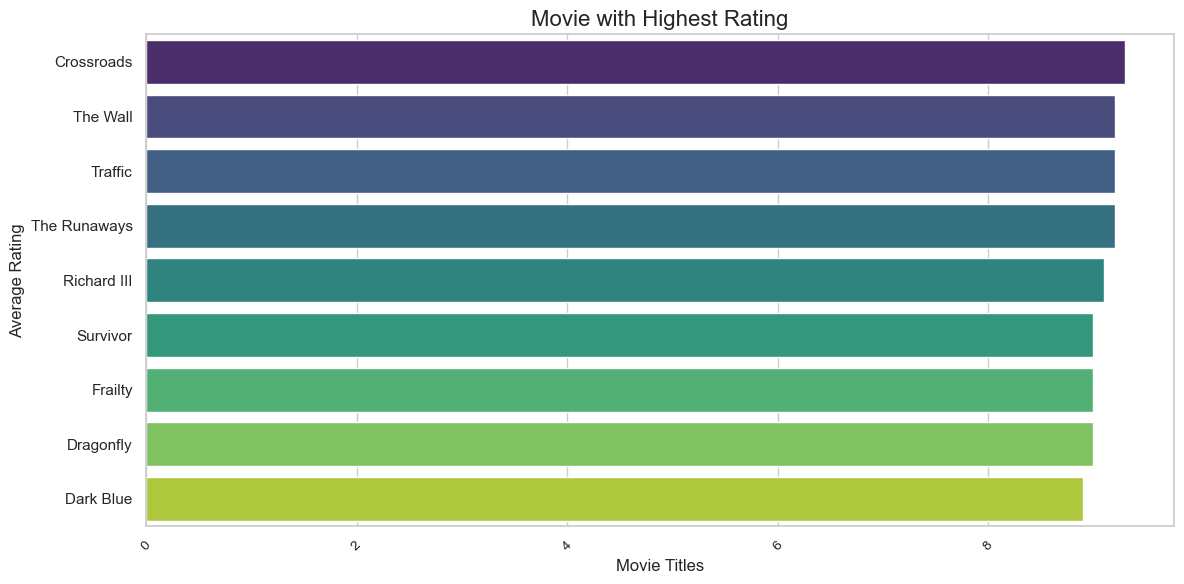

In [512]:
sns.set_theme(style="whitegrid")

top_10_revenues = matched_df.nlargest(10,"averagerating")

top_10_revenues = top_10_revenues.sort_values("averagerating", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x="averagerating", y="original_title", data=top_10_revenues, palette="viridis",orient="h")


plt.title("Movie with Highest Rating", fontsize=16)
plt.xlabel("Movie Titles", fontsize=12)
plt.ylabel("Average Rating", fontsize=12)


plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()


C:\Users\jmuriithi\AppData\Local\Temp\ipykernel_3076\713371371.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="foreign_gross", y="title", data=top_10_revenues, palette="viridis",orient="h")


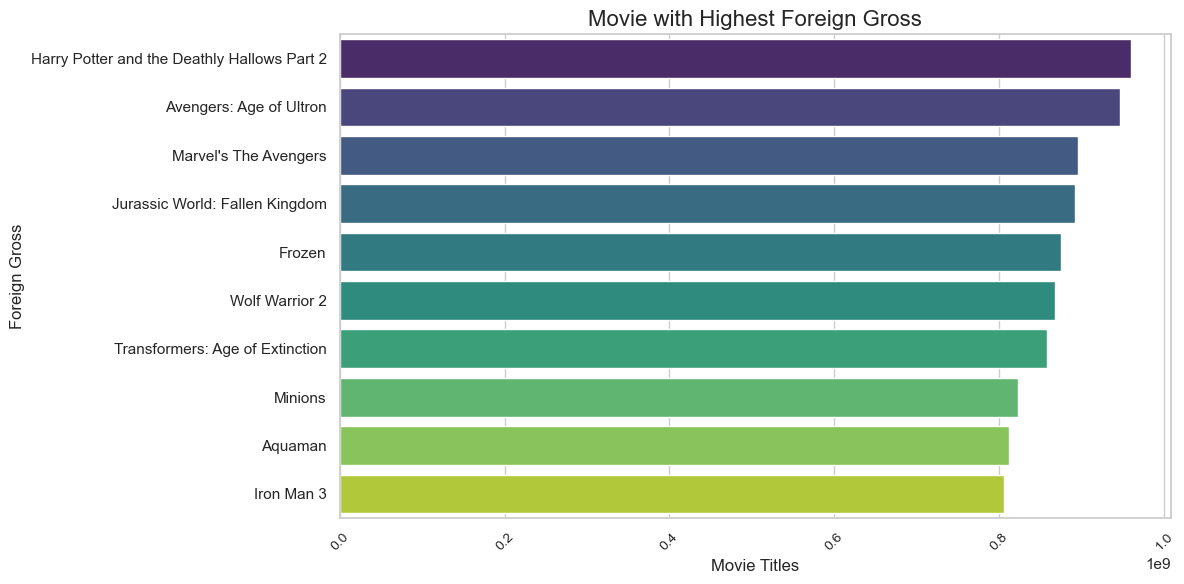

In [513]:
sns.set_theme(style="whitegrid")

top_10_revenues = df_gross.nlargest(10,"foreign_gross")

top_10_revenues = top_10_revenues.sort_values("foreign_gross", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x="foreign_gross", y="title", data=top_10_revenues, palette="viridis",orient="h")


plt.title("Movie with Highest Foreign Gross", fontsize=16)
plt.xlabel("Movie Titles", fontsize=12)
plt.ylabel("Foreign Gross", fontsize=12)


plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()


In [530]:
df_exploded

,genres,production_budget,worldwide_gross,numvotes,gross_earnings
0,Action,2.812391e+07,7.058096e+07,2627.173913,4.245705e+07
1,Action,4.500000e+06,1.177400e+04,6955.000000,-4.488226e+06
2,Adventure,4.500000e+06,1.177400e+04,6955.000000,-4.488226e+06
3,Action,1.218125e+08,4.570707e+08,190419.375000,3.352582e+08
4,Adventure,1.218125e+08,4.570707e+08,190419.375000,3.352582e+08
...,...,...,...,...,...
790,Thriller,1.434000e+07,4.364433e+06,10279.666667,-9.975567e+06
791,Sport,1.900000e+07,5.745503e+06,77.000000,-1.325450e+07
792,Thriller,2.718006e+07,6.491041e+07,227.738095,3.773034e+07
793,War,4.000000e+07,3.019910e+07,9.000000,-9.800895e+06


In [552]:
prod_wwwgross_df_exploded = df_exploded.groupby('genres')[['production_budget', 'worldwide_gross']].mean()
prod_wwwgross_df_exploded = prod_wwwgross_df_exploded.reset_index()
prod_wwwgross_df_exploded

,genres,production_budget,worldwide_gross
0,Action,4.804199e+07,1.160846e+08
1,Adventure,5.627934e+07,1.832333e+08
2,Animation,5.522589e+07,1.701160e+08
3,Biography,2.743001e+07,7.141653e+07
4,Comedy,2.765695e+07,8.047069e+07
5,Crime,2.600301e+07,5.647420e+07
6,Documentary,1.997831e+07,5.105460e+07
7,Drama,2.659960e+07,8.100754e+07
8,Family,3.862525e+07,1.307622e+08
9,Fantasy,4.351616e+07,1.420349e+08


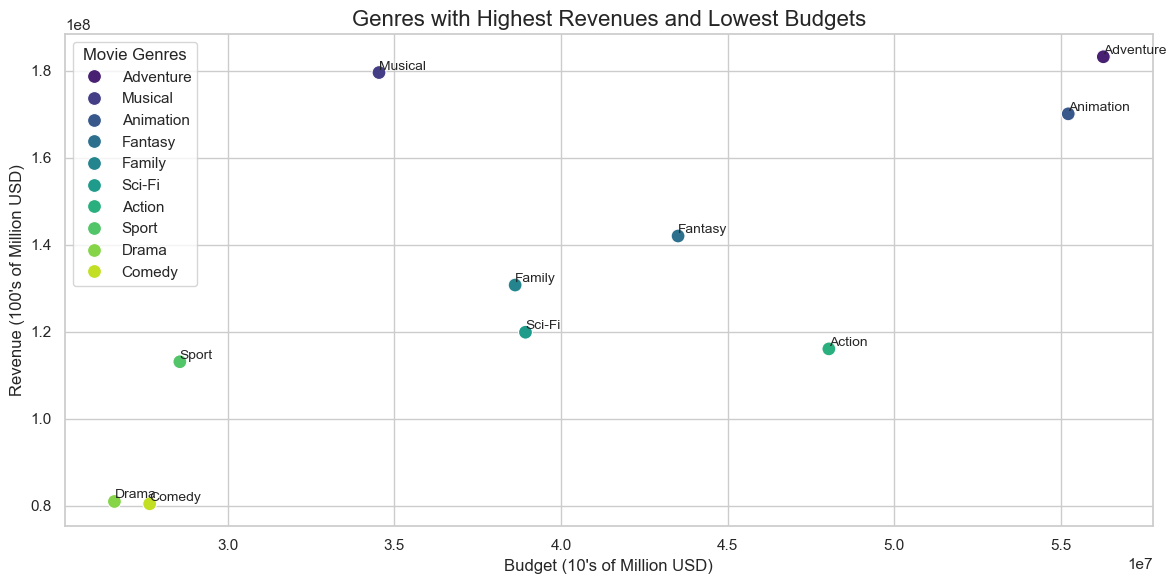

In [556]:
# Sorting by 'worldwide_gross' and 'production_budget' for visualization
df_sorted = prod_wwwgross_df_exploded.sort_values(by=["worldwide_gross", "production_budget"], ascending=[False, True]).head(10)

# Plotting the scatterplot
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x="production_budget", y="worldwide_gross", hue="genres", data=df_sorted, palette="viridis", s=100
)

# Adding genre labels to all points
for i in range(len(df_sorted)):
    plt.text(
        x=df_sorted["production_budget"].iloc[i] + 0.5,  # Adjust position of label horizontally
        y=df_sorted["worldwide_gross"].iloc[i],  # Adjust position vertically
        s=df_sorted["genres"].iloc[i],  # Genre name
        fontsize=10,  # Label font size
        ha='left',  # Horizontal alignment
        va='bottom'  # Vertical alignment
    )

# Title and labels
plt.title("Genres with Highest Revenues and Lowest Budgets", fontsize=16)
plt.xlabel("Budget (10's of Million USD)", fontsize=12)
plt.ylabel("Revenue (100's of Million USD)", fontsize=12)
plt.legend(title="Movie Genres")
plt.tight_layout()

plt.show()


Musical has the highest revenue and the lowest budget cost

In [571]:
matched_df_known_for

,movie_id,original_title,primary_title,start_year,genres,averagerating,numvotes,person_id,primary_name,primary_profession,id,release_date,movie_title,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,Foodfight!,2012,"Action,Animation,Comedy",1.9,8248,nm0103750,Wayne Brady,"actor,writer,producer",26,"Dec 31, 2012",Foodfight!,45000000.0,0.0,73706.0
1,tt0249516,Foodfight!,Foodfight!,2012,"Action,Animation,Comedy",1.9,8248,nm0841854,Rebecca Swanson,"writer,miscellaneous",26,"Dec 31, 2012",Foodfight!,45000000.0,0.0,73706.0
2,tt0249516,Foodfight!,Foodfight!,2012,"Action,Animation,Comedy",1.9,8248,nm3388028,Loressa Clisby,"visual_effects,art_director,director",26,"Dec 31, 2012",Foodfight!,45000000.0,0.0,73706.0
8,tt0337692,On the Road,On the Road,2012,"Adventure,Drama,Romance",6.1,37886,nm0001897,John M. Davis,"music_department,sound_department,composer",17,"Mar 22, 2013",On the Road,25000000.0,720828.0,9313302.0
9,tt0337692,On the Road,On the Road,2012,"Adventure,Drama,Romance",6.1,37886,nm0086006,Brian Blade,"music_department,soundtrack",17,"Mar 22, 2013",On the Road,25000000.0,720828.0,9313302.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53591,tt9861522,Ali,Ali,2019,Drama,7.7,79,nm7950798,Alper Aytekin,"miscellaneous,music_department,sound_department",45,"Dec 25, 2001",Ali,109000000.0,58183966.0,87683966.0
53592,tt9861522,Ali,Ali,2019,Drama,7.7,79,nm9607013,Ramazan Özer,director,45,"Dec 25, 2001",Ali,109000000.0,58183966.0,87683966.0
53593,tt9861522,Ali,Ali,2019,Drama,7.7,79,nm9607014,Fatih Gürler,"director,producer",45,"Dec 25, 2001",Ali,109000000.0,58183966.0,87683966.0
53594,tt9861522,Ali,Ali,2019,Drama,7.7,79,nm9614031,Gurbet Gurur Canturk,writer,45,"Dec 25, 2001",Ali,109000000.0,58183966.0,87683966.0


In [574]:
df_exploded_proffession = matched_df_known_for.assign(primary_profession=matched_df_known_for['primary_profession'].str.split(',')).explode('primary_profession')
df_exploded_proffession = df_exploded_proffession.reset_index(drop=True)
df_exploded_proffession

,movie_id,original_title,primary_title,start_year,genres,averagerating,numvotes,person_id,primary_name,primary_profession,id,release_date,movie_title,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,Foodfight!,2012,"Action,Animation,Comedy",1.9,8248,nm0103750,Wayne Brady,actor,26,"Dec 31, 2012",Foodfight!,45000000.0,0.0,73706.0
1,tt0249516,Foodfight!,Foodfight!,2012,"Action,Animation,Comedy",1.9,8248,nm0103750,Wayne Brady,writer,26,"Dec 31, 2012",Foodfight!,45000000.0,0.0,73706.0
2,tt0249516,Foodfight!,Foodfight!,2012,"Action,Animation,Comedy",1.9,8248,nm0103750,Wayne Brady,producer,26,"Dec 31, 2012",Foodfight!,45000000.0,0.0,73706.0
3,tt0249516,Foodfight!,Foodfight!,2012,"Action,Animation,Comedy",1.9,8248,nm0841854,Rebecca Swanson,writer,26,"Dec 31, 2012",Foodfight!,45000000.0,0.0,73706.0
4,tt0249516,Foodfight!,Foodfight!,2012,"Action,Animation,Comedy",1.9,8248,nm0841854,Rebecca Swanson,miscellaneous,26,"Dec 31, 2012",Foodfight!,45000000.0,0.0,73706.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132226,tt9861522,Ali,Ali,2019,Drama,7.7,79,nm9607014,Fatih Gürler,producer,45,"Dec 25, 2001",Ali,109000000.0,58183966.0,87683966.0
132227,tt9861522,Ali,Ali,2019,Drama,7.7,79,nm9614031,Gurbet Gurur Canturk,writer,45,"Dec 25, 2001",Ali,109000000.0,58183966.0,87683966.0
132228,tt9899880,Columbus,Columbus,2018,Comedy,5.8,5,nm5971240,Hatef Alimardani,director,93,"Aug 4, 2017",Columbus,700000.0,1017107.0,1110511.0
132229,tt9899880,Columbus,Columbus,2018,Comedy,5.8,5,nm5971240,Hatef Alimardani,writer,93,"Aug 4, 2017",Columbus,700000.0,1017107.0,1110511.0


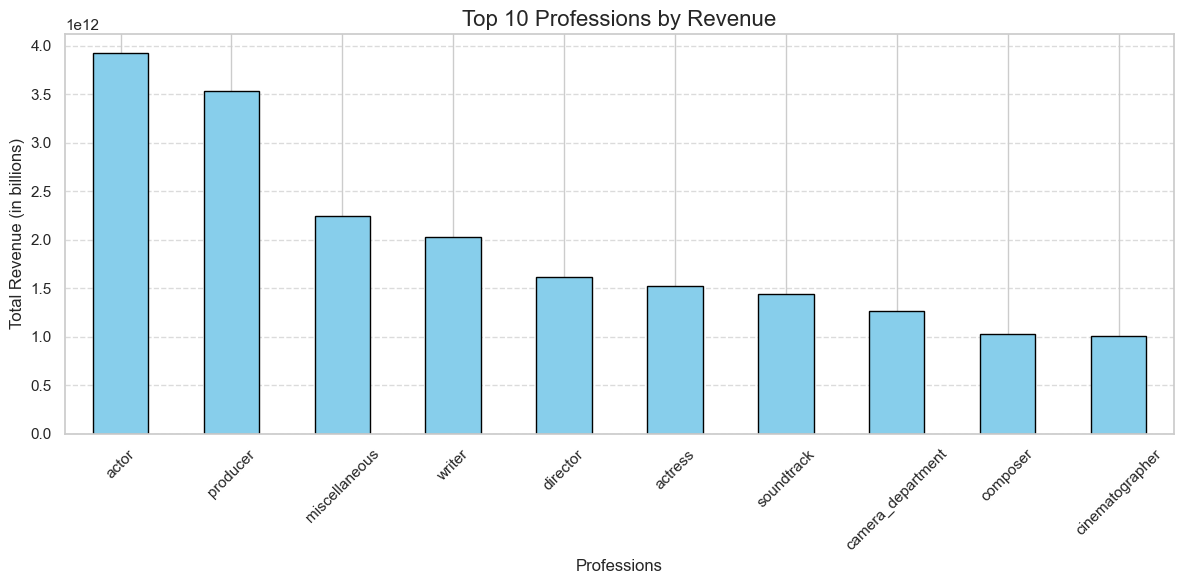

In [575]:
director_revenue = df_exploded_proffession.groupby('primary_profession')['worldwide_gross'].sum().sort_values(ascending=False)

# Select the top 10 directors
top_10_directors = director_revenue.head(10)

# Plotting the bar plot
plt.figure(figsize=(12, 6))
top_10_directors.plot(kind='bar', color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Top 10 Professions by Revenue', fontsize=16)
plt.xlabel('Professions', fontsize=12)
plt.ylabel('Total Revenue (in billions)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y',
linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

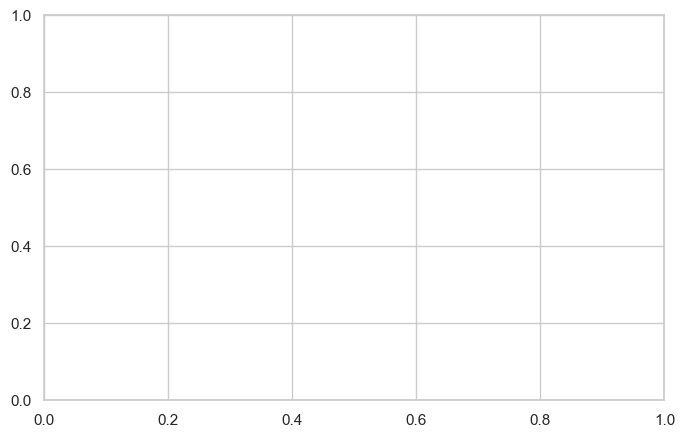

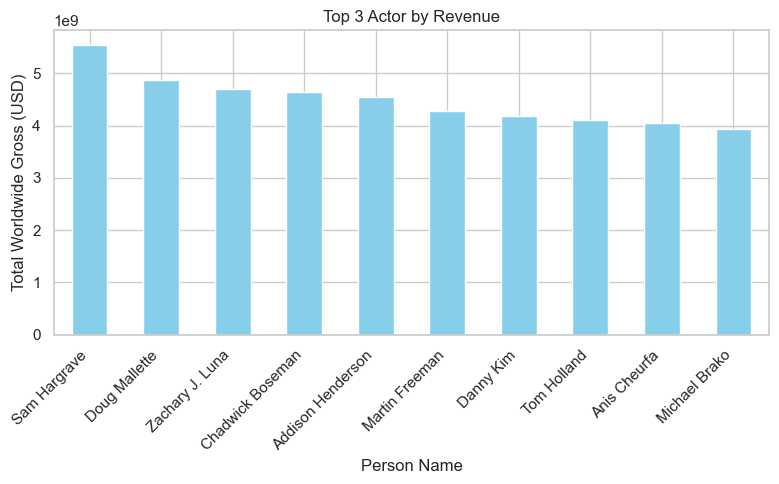

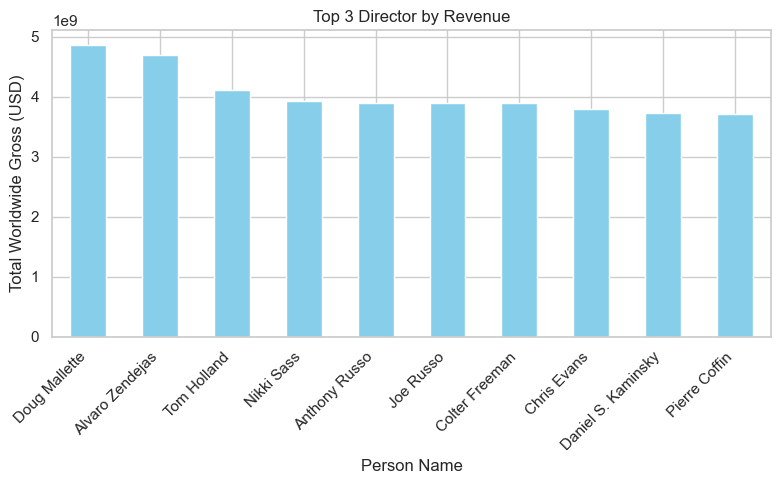

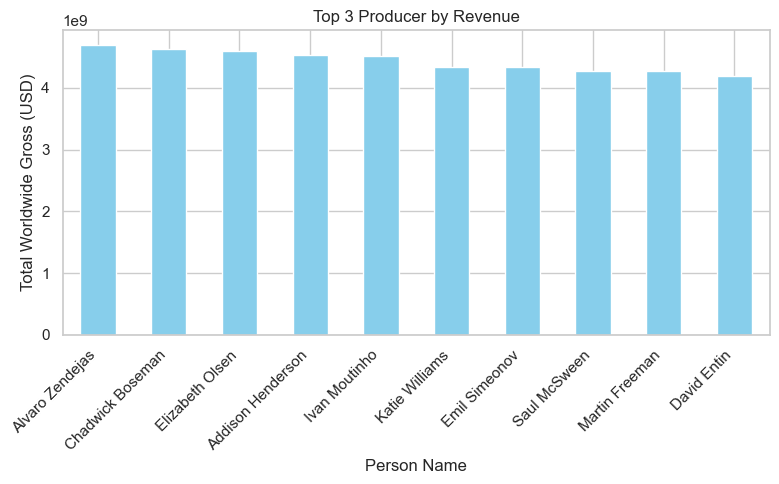

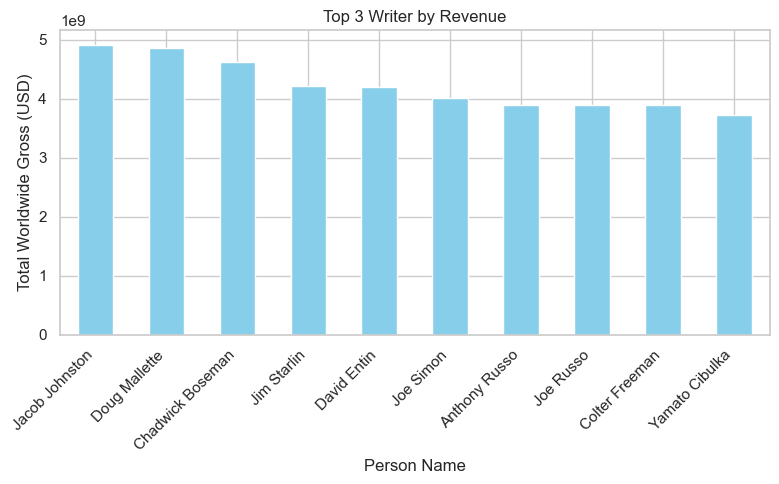

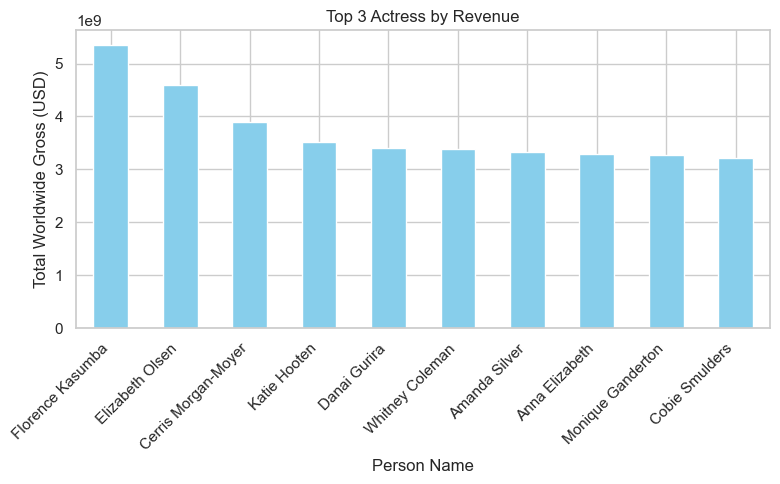

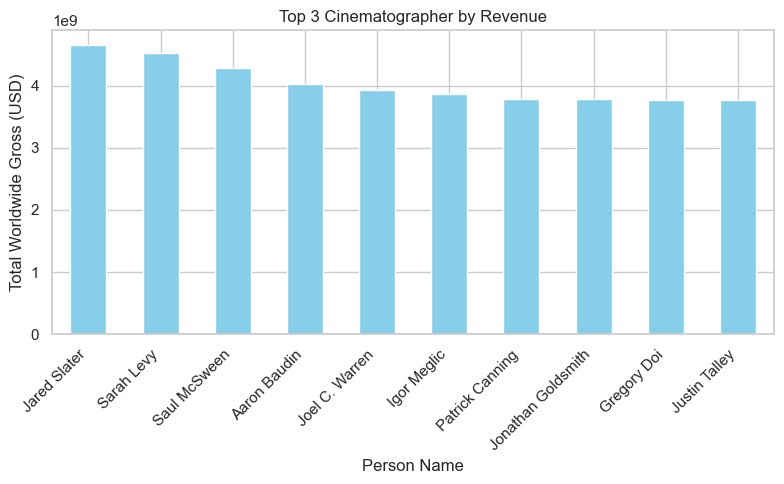

In [593]:
categories = ['actor', 'director', 'producer', 'writer', 'actress', 'cinematographer']

# Loop through each category and create a plot
for category in categories:
    top_3 = (
        df_exploded_proffession[df_exploded_proffession['primary_profession'] == category]  # Filter by profession
        .groupby('primary_name')['worldwide_gross']  # Group by person name
        .sum()  # Sum revenue for each individual
        .sort_values(ascending=False)  # Sort by revenue descending
        .head(10)  # Get the top 3
    )

    # Plot the results
    plt.figure(figsize=(8, 5))
    top_3.plot(kind='bar', color='skyblue')
    plt.title(f"Top 3 {category.capitalize()} by Revenue")
    plt.ylabel("Total Worldwide Gross (USD)")
    plt.xlabel("Person Name")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


In [595]:
unique_professions = df_exploded_proffession['primary_profession'].value_counts()
unique_professions

primary_profession
producer                     19384
actor                        19198
writer                       11023
miscellaneous                10175
actress                       8824
director                      8585
soundtrack                    6916
camera_department             5803
composer                      5222
cinematographer               4853
music_department              4140
editor                        3711
art_department                2895
editorial_department          2824
visual_effects                2440
assistant_director            2302
stunts                        2011
production_manager            1964
production_designer           1605
sound_department              1557
executive                     1260
art_director                  1110
location_management            757
casting_department             639
animation_department           552
special_effects                427
casting_director               358
set_decorator                  353
m

## Statistical Analysis

Analyzing the Distribution of Movie budgets  Across Genres

In [596]:
matched_df
df_budget_genres = matched_df[['genres', 'production_budget', 'worldwide_gross']]
print(df_budget_genres.duplicated().value_counts())
df_budget_genres.drop_duplicates(subset=None, inplace=True)
df_budget_genres.duplicated().value_counts()

df_budget_genres

False    2563
True       75
Name: count, dtype: int64


C:\Users\jmuriithi\AppData\Local\Temp\ipykernel_3076\692405810.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_budget_genres.drop_duplicates(subset=None, inplace=True)


,genres,production_budget,worldwide_gross
0,"Action,Animation,Comedy",45000000.0,73706.0
1,None,200000.0,1165996.0
2,"Adventure,Drama,Romance",25000000.0,9313302.0
3,"Adventure,Comedy,Drama",91000000.0,187861183.0
4,"Action,Crime,Drama",28000000.0,62108587.0
...,...,...,...
2630,"Action,Sci-Fi,Thriller",3000000.0,101773.0
2631,Drama,35000000.0,15471969.0
2632,Comedy,700000.0,0.0
2633,"Adventure,Biography,Drama",32000000.0,36299670.0


In [ ]:
df_exploded = df_budget_genres.assign(genres=df_budget_genres['genres'].str.split(',')).explode('genres')
df_exploded.drop_duplicates(subset=['genres','production_budget', 'worldwide_gross'], inplace=True)
df_exploded.duplicated().value_counts()
# df_exploded.drop_duplicates(subset=None, inplace=True, ignore_index=False)

In [ ]:
# TO REMOVE
df_exploded.dropna(subset=['genres', 'production_budget', 'worldwide_gross'], inplace=True)
df_exploded.drop_duplicates(subset=['genres', 'production_budget', 'worldwide_gross'], inplace=True)
print(df_exploded.duplicated().value_counts())

In [ ]:
df_exploded = df_exploded.reset_index(drop=True)

In [ ]:
#Summary statistics for budget by genre:
budget_stats = df_exploded.groupby('genres')['production_budget'].describe()
budget_stats

In [ ]:
#Average budget per genre:
avg_budget_per_genre = df_exploded.groupby('genres')['production_budget'].mean().sort_values(ascending=False)
avg_budget_per_genre

In [ ]:
# Distribution of budget across genres (Bar Plot):
plt.figure(figsize=(12, 6))
sns.barplot(data=df_exploded, x='genres', y='production_budget', estimator=sum)
plt.xticks(rotation=90)
plt.title('Total Production Budget by Genre')
plt.ylabel('Total Budget (USD)')
plt.xlabel('Genres')
plt.show()

#### Simple Linear Regression

In [ ]:
# Independent variable
X = matched_df[['production_budget']]  
# Dependent variable
y = matched_df['worldwide_gross'] 

model = LinearRegression()
model.fit(X, y)

#Coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

print(f'Intercept: {intercept}')
print(f'Coefficients: {coefficients}')

In [ ]:
# Predict using the fitted model
y_pred = model.predict(X)

plt.scatter(y, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.plot(X, y_pred)
plt.show()

There is no linear relation between the production budget and worlwide gross.

#### Hyposthesis Testing

Testing whether there is significant difference in Worldwide gross revenue by Genres.

In [ ]:
genre1_ratings = matched_df[matched_df['averagerating'] == 'Action']['worldwide_gross']
genre2_ratings = matched_df[matched_df['averagerating'] == 'Comedy']['worldwide_gross']

print(genre1_ratings)

In [ ]:
matched_df

In [ ]:
# TO REVIEW AGAIN

In [ ]:
# 1. Prepare the Data
df_budget_genres = matched_df[['genres', 'worldwide_gross']]
# Split genres into separate rows (explode the genre list)
df_exploded = df_budget_genres.assign(genres=df_budget_genres['genres'].str.split(',')).explode('genres')
# Ensure 'worldwide_gross' is numeric
df_exploded['worldwide_gross'] = pd.to_numeric(df_exploded['worldwide_gross'], errors='coerce')
# Remove any rows with missing 'worldwide_gross' or 'genres' data
df_exploded.dropna(subset=['worldwide_gross', 'genres'], inplace=True)
# 2. Group the data by 'genres' and calculate the revenue for each genre
# You can also plot the revenue distribution across genres before ANOVA
plt.figure(figsize=(12, 6))
sns.boxplot(x='genres', y='worldwide_gross', data=df_exploded)
plt.xticks(rotation=90)
plt.title('Distribution of Worldwide Gross by Genre')
plt.xlabel('Genres')
plt.ylabel('Worldwide Gross (USD)')
plt.show()
# 3. Perform ANOVA to compare the revenue (worldwide_gross) across genres
# Create a list of data series for each genre
genre_groups = [df_exploded[df_exploded['genres'] == genre]['worldwide_gross'] 
                for genre in df_exploded['genres'].unique()]
# Perform the one-way ANOVA
f_stat, p_value = stats.f_oneway(*genre_groups)
# Output the results
print(f'ANOVA F-statistic: {f_stat}')
print(f'ANOVA p-value: {p_value}')
# 4. Interpret the Results
if p_value < 0.05:
    print("There are significant differences in revenue across genres.")
else:
    print("There are no significant differences in revenue across genres.")


In [ ]:
# Checking all the columns
matched_df.columns

In [ ]:
corr_df = matched_df.select_dtypes(include=['number'])
corr_df

In [ ]:
corr_df.drop_duplicates(inplace=True)
corr_df

In [ ]:
fig, ax = plt.subplots(figsize = (12, 7))
ax.set_title('Correlation Using Heatmap', fontsize=14)

corr = corr_df.corr()
# annote True  to display the correlations on each heatmap
sns.heatmap(corr, annot = True) 
# saving the graph
plt.savefig('Correlation using Heatmap');

plt.show()

## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***